# Obtendo valores de M/Ms quando o campo é zero (durante a "descida" e "subida" da curva de histerese) para cada ângulo

A magnetização de saturação em uma curva de histerese normalizada é igual a 1, logo, matematicamente temos que para um ângulo teta (θ) qualquer:

                          Mr/Ms = Mr/1 = Mr
                          
O Mr é obtido atraves da média em módulo dos dois pontos de M/Ms quando o campo é igual a zero. Em uma curva de histerese teremos para cada ângulo um valor de M/Ms com campo igual a zero durante a "descida" e outro valor de M/Ms com campo igual a zero durante a "subida".

In [1]:
#######################################
## CARREANDO BIBLIOTECAS NECESSÁRIAS ##
#######################################

import numpy as np #manipulação de arrays e aplicações matemáticas
import matplotlib.pyplot as plt #plot de figuras
import os #manipulação de diretórios/arquivos

###################################
## CHAMANDO E RECONHECENDO DADOS ##
###################################

# Apontando o caminho para a pasta com os arquivos .txt de cada ângulo
caminho_pasta = 'C:/Winpython/WPy64-39100/notebooks/IC/CLEIZA/Ta_CoFeB_Ag_x15'

# Lista todos os arquivos na pasta
arquivos = os.listdir(caminho_pasta)

# Filtra apenas os arquivos .txt
arquivos_txt = [arquivo for arquivo in arquivos if arquivo.endswith('.txt')]

# Função para extrair o ângulo do nome do arquivo
def extrair_angulo(nome_arquivo):
    partes = nome_arquivo.split('_')
    angulo_str = partes[-1].split('.')[0]
    return int(angulo_str)

# Ordena os arquivos pelo ângulo
arquivos_txt.sort(key=extrair_angulo)

###################################################################################################
## OBTENDO VALORES DE M/Ms (na "descida" e na "subida") quando o campo é zero - para cada ângulo ##
###################################################################################################

# Lista para armazenar os valores de M/Ms quando o campo é zero para cada ângulo
valores_mm_s = []

# Obtendo os valores de M/Ms quando o campo é zero - tanto na "descida" quanto na "subida" (para cada ângulo)
for arquivo_txt in arquivos_txt:
    # Extrai o ângulo do nome do arquivo
    angulo = extrair_angulo(arquivo_txt)

    # Caminho completo do arquivo
    caminho_arquivo = os.path.join(caminho_pasta, arquivo_txt)
    
    # Carrega os dados do arquivo, ignorando 12 linhas
    dados = np.loadtxt(caminho_arquivo, skiprows=12)

    # Extrai os dados de campo e magnetização
    campo = dados[:, 0]
    magnetizacao = dados[:, 1]
    
    # Normalizando apenas a magnetização
    magnetizacao_normalizada = (2 * magnetizacao - (magnetizacao.max() + magnetizacao.min())) / (magnetizacao.max() - magnetizacao.min())

    # Encontrando os índices onde o campo é zero durante a descida e durante a subida
    indices_zero_descida = np.where(np.diff(np.signbit(campo)))[0][0]
    indices_zero_subida = np.where(np.diff(np.signbit(campo)))[0][-1] + 1
    
    # Calculando os valores de M/Ms quando o campo é zero durante a descida e durante a subida
    valor_mm_s_descida = magnetizacao_normalizada[indices_zero_descida]
    valor_mm_s_subida = magnetizacao_normalizada[indices_zero_subida]

    # Armazenando os valores para este ângulo
    valores_mm_s.append((angulo, valor_mm_s_descida, valor_mm_s_subida))

# Exibindo os valores de M/Ms quando o campo é zero para cada ângulo
print("Valores de M/Ms quando o campo é zero para cada ângulo:")
for angulo, valor_mm_s_descida, valor_mm_s_subida in valores_mm_s:
    print(f'Ângulo {angulo}° (Descida): {valor_mm_s_descida:.2f}')
    print(f'Ângulo {angulo}° (Subida): {valor_mm_s_subida:.2f}')
    
######################################################################
## OBTENDO OS VALORES DA MAGNETIZAÇÃO DE REMANÊNCIA PARA CADA ÂNGULO #
######################################################################

# Lista para armazenar os valores de magnetização de remanência para cada ângulo
valores_remanencia = []

# Calculando a média em módulo dos valores de M/Ms para cada ângulo
for angulo, valor_mm_s_descida, valor_mm_s_subida in valores_mm_s:
    # Calcula a média em módulo dos valores de descida e subida
    media_descida_subida = (np.abs(valor_mm_s_descida) + np.abs(valor_mm_s_subida)) / 2
    
    # Armazena o valor de magnetização de remanência para este ângulo
    valores_remanencia.append((angulo, media_descida_subida))

# Exibindo os valores de magnetização de remanência para cada ângulo
print("\nValores de magnetização de remanência para cada ângulo:")
for angulo, valor_remanencia in valores_remanencia:
    print(f'Ângulo {angulo}°: Mr = {valor_remanencia:.2f}')


Valores de M/Ms quando o campo é zero para cada ângulo:
Ângulo 0° (Descida): 0.80
Ângulo 0° (Subida): -0.78
Ângulo 10° (Descida): 0.77
Ângulo 10° (Subida): -0.78
Ângulo 20° (Descida): 0.76
Ângulo 20° (Subida): -0.70
Ângulo 30° (Descida): 0.67
Ângulo 30° (Subida): -0.71
Ângulo 40° (Descida): 0.67
Ângulo 40° (Subida): -0.60
Ângulo 50° (Descida): 0.67
Ângulo 50° (Subida): -0.61
Ângulo 60° (Descida): 0.62
Ângulo 60° (Subida): -0.53
Ângulo 70° (Descida): 0.55
Ângulo 70° (Subida): -0.61
Ângulo 80° (Descida): 0.59
Ângulo 80° (Subida): -0.20
Ângulo 90° (Descida): 0.60
Ângulo 90° (Subida): -0.59
Ângulo 100° (Descida): 0.63
Ângulo 100° (Subida): -0.62
Ângulo 110° (Descida): 0.61
Ângulo 110° (Subida): -0.65
Ângulo 120° (Descida): 0.66
Ângulo 120° (Subida): -0.63
Ângulo 130° (Descida): 0.71
Ângulo 130° (Subida): -0.76
Ângulo 140° (Descida): 0.69
Ângulo 140° (Subida): -0.69
Ângulo 150° (Descida): 0.71
Ângulo 150° (Subida): -0.74
Ângulo 160° (Descida): 0.79
Ângulo 160° (Subida): -0.74
Ângulo 170° (D

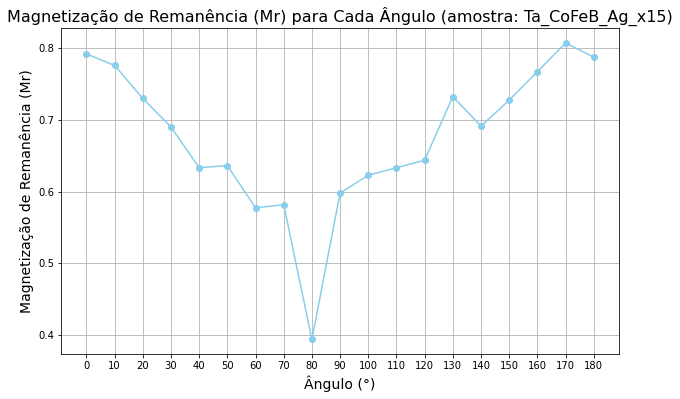

In [2]:
#################################################################
## PLOTANDO A MAGNETIZAÇÃO DE REMANÊNCIA (Mr) PARA CADA ÂNGULO ##
#################################################################

# Extrai os ângulos e os valores de magnetização de remanência
angulos = [angulo for angulo, _ in valores_remanencia]
valores = [valor for _, valor in valores_remanencia]

# Cria o gráfico de linha
plt.figure(figsize=(10, 6))
plt.plot(angulos, valores, marker='o', color='skyblue', linestyle='-')

# Define os valores de ângulo no eixo x variando de 10 em 10
plt.xticks(range(min(angulos), max(angulos)+1, 10,))

# Adiciona rótulos e título
plt.xlabel('Ângulo (°)', fontsize=14)
plt.ylabel('Magnetização de Remanência (Mr)', fontsize=14)
plt.title('Magnetização de Remanência (Mr) para Cada Ângulo (amostra: Ta_CoFeB_Ag_x15)', fontsize=16)

# Adiciona grade
plt.grid(True)

# Exibe o gráfico
plt.show()


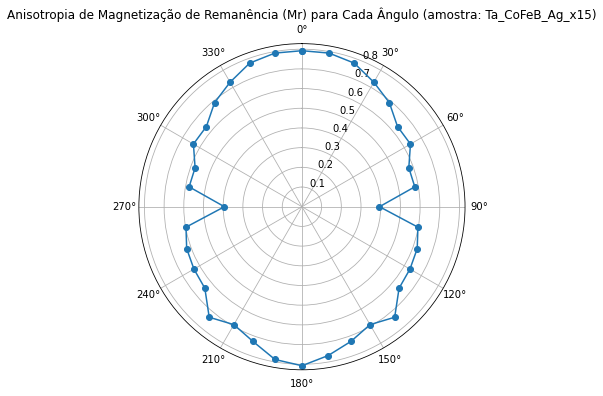

In [6]:
############################################
## DESLOCANDO OS DADOS 10° PARA A DIREITA ## (Fazer apenas se necessário)
############################################

# Deslocando os dados 10° para a direita
valores_remanencia_deslocados = [(angulo + 10 if angulo + 10 < 360 else angulo + 10 - 360, valor) for angulo, valor in valores_remanencia]

#########################
## DUPLICANDO OS DADOS ##
#########################

# Criando um dicionário para armazenar valores únicos
valores_remanencia_dict = {angulo: valor for angulo, valor in valores_remanencia_deslocados}

# Atualizando novamente os valores de 0° e 360° após duplicação
if 0 not in valores_remanencia_dict:
    valores_remanencia_dict[0] = valores_remanencia_dict.get(350, valores_remanencia_dict.get(10))
if 360 not in valores_remanencia_dict:
    valores_remanencia_dict[360] = valores_remanencia_dict.get(0, valores_remanencia_dict.get(350))

# Duplicando os dados para 0-360 graus, evitando duplicações para ângulo igual
for angulo, valor_remanencia in list(valores_remanencia_deslocados):
    if angulo > 0 and angulo < 180:
        angulo_duplicado = 360 - angulo
        if angulo_duplicado not in valores_remanencia_dict:
            valores_remanencia_dict[angulo_duplicado] = valor_remanencia

# Ordenando os valores duplicados por ângulo
valores_remanencia_duplicados = sorted(valores_remanencia_dict.items())

# Separando ângulos e valores de remanência
angulos = [x[0] for x in valores_remanencia_duplicados]
remanencias = [x[1] for x in valores_remanencia_duplicados]

# Convertendo ângulos para radianos para plotagem polar
angulos_rad = np.radians(angulos)

########################################
## PLOTANDO OS DADOS EM GRÁFICO POLAR ##
########################################

# Plotando os resultados em coordenadas polares
plt.figure(figsize=(10, 6))
ax = plt.subplot(111, projection='polar')
ax.plot(angulos_rad, remanencias, 'o-', label='Magnetização de Remanência')
ax.set_theta_direction(-1)  # Direção dos ângulos no sentido horário
ax.set_theta_offset(np.pi / 2.0)  # Define 0° no topo
ax.set_xticks(np.radians(np.arange(0, 360, 30)))
ax.set_xticklabels([f'{i}°' for i in range(0, 360, 30)])
plt.title('Anisotropia de Magnetização de Remanência (Mr) para Cada Ângulo (amostra: Ta_CoFeB_Ag_x15)')
#plt.legend()
plt.grid(True)
plt.show()

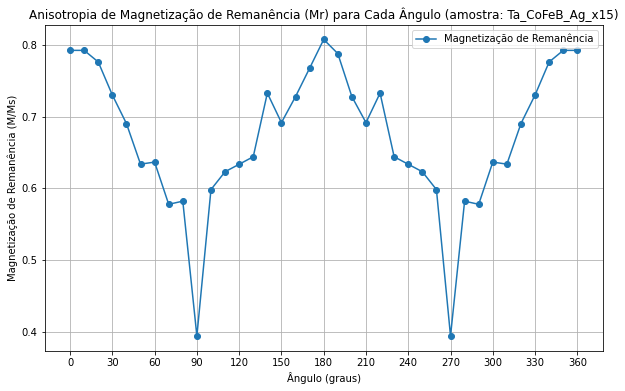

In [4]:
#######################
## PLOTANDO OS DADOS ##
#######################

# Plotando os resultados
plt.figure(figsize=(10, 6))
plt.plot(angulos, remanencias, 'o-', label='Magnetização de Remanência')
plt.xlabel('Ângulo (graus)')
plt.ylabel('Magnetização de Remanência (M/Ms)')
plt.title('Anisotropia de Magnetização de Remanência (Mr) para Cada Ângulo (amostra: Ta_CoFeB_Ag_x15)')
plt.legend()
plt.grid(True)
plt.xticks(np.arange(0, 361, 30))
plt.show()